In [16]:
import pandas as pd
import os

# Get the current working directory
pwd = os.getcwd()

# Move up one directory to the parent directory
parent_dir = os.path.abspath(os.path.join(pwd, os.pardir))

# Navigate to the data folder
data_dir = os.path.join(parent_dir, 'raw')

# Load the raw data
data = pd.read_csv(f'{data_dir}\\raw_AAPL_2022-01-01_2022-12-31')

# Display the first few rows
data.head()


Contents of the 'raw' directory: ['raw_AAPL_2022-01-01_2022-12-31', 'raw_META_2022-01-01_2022-12-31']


,Open,High,Low,Close,Adj Close,Volume
0,177.830002,182.880005,177.710007,182.009995,179.724548,104487900
1,182.630005,182.940002,179.119995,179.699997,177.443573,99310400
2,179.610001,180.169998,174.639999,174.919998,172.723587,94537600
3,172.699997,175.300003,171.639999,172.000000,169.840256,96904000
4,172.889999,174.139999,171.029999,172.169998,170.008102,86709100


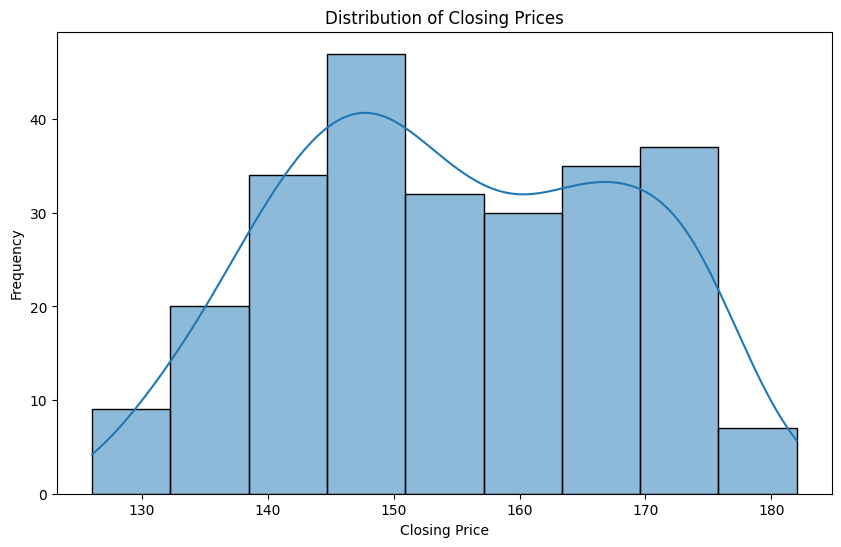

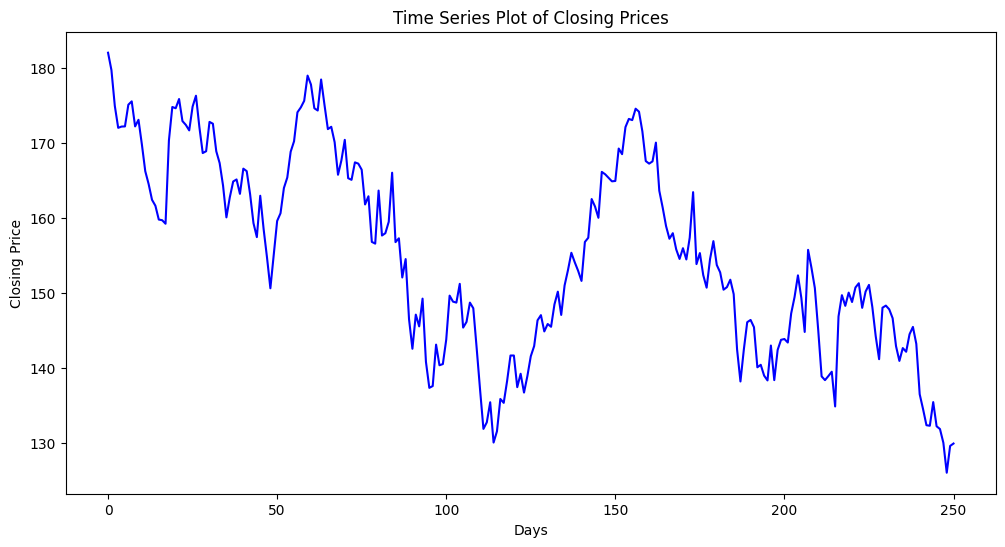

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

# Plot time series data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], color='blue')
plt.title('Time Series Plot of Closing Prices')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.show()


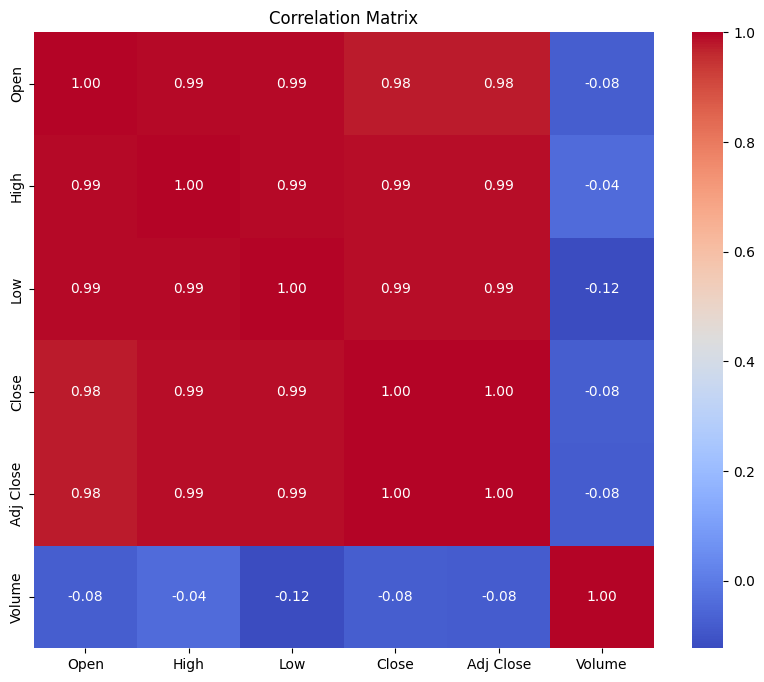

In [20]:
# Basic statistics
basic_stats = data.describe()

# Correlation matrix
correlation_matrix = data.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Check for missing values
missing_values = data.isnull().sum()

# Identify outliers
# You can use box plots or scatter plots to visualize outliers


In [22]:
from ta import add_all_ta_features
df = add_all_ta_features(data, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
0,177.830002,182.880005,177.710007,182.009995,179.724548,104487900,6.932133e+07,104487900,0.663439,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,182.009995,0.000000,0.000000,0.000000
1,182.630005,182.940002,179.119995,179.699997,177.443573,99310400,1.680499e+05,5177500,0.000825,-2.294068e+08,...,-0.101339,-0.020268,-0.081071,-0.396736,-0.079347,-0.317389,181.209953,-1.269160,-1.277282,-1.269160
2,179.610001,180.169998,174.639999,174.919998,172.723587,94537600,-8.479616e+07,-89360100,-0.284230,-2.611900e+08,...,-0.390378,-0.094290,-0.296088,-1.076099,-0.278698,-0.797401,179.648492,-2.659988,-2.696006,-3.895388
3,172.699997,175.300003,171.639999,172.000000,169.840256,96904000,-1.626371e+08,-186264100,-0.411489,-2.643000e+08,...,-0.743453,-0.224122,-0.519331,-1.417991,-0.506556,-0.911435,178.305849,-1.669334,-1.683424,-5.499695
4,172.889999,174.139999,171.029999,172.169998,170.008102,86709100,-1.857781e+08,-99555000,-0.385473,-2.244371e+08,...,-1.006424,-0.380583,-0.625841,-2.484977,-0.902240,-1.582736,177.058930,0.098836,0.098787,-5.406295


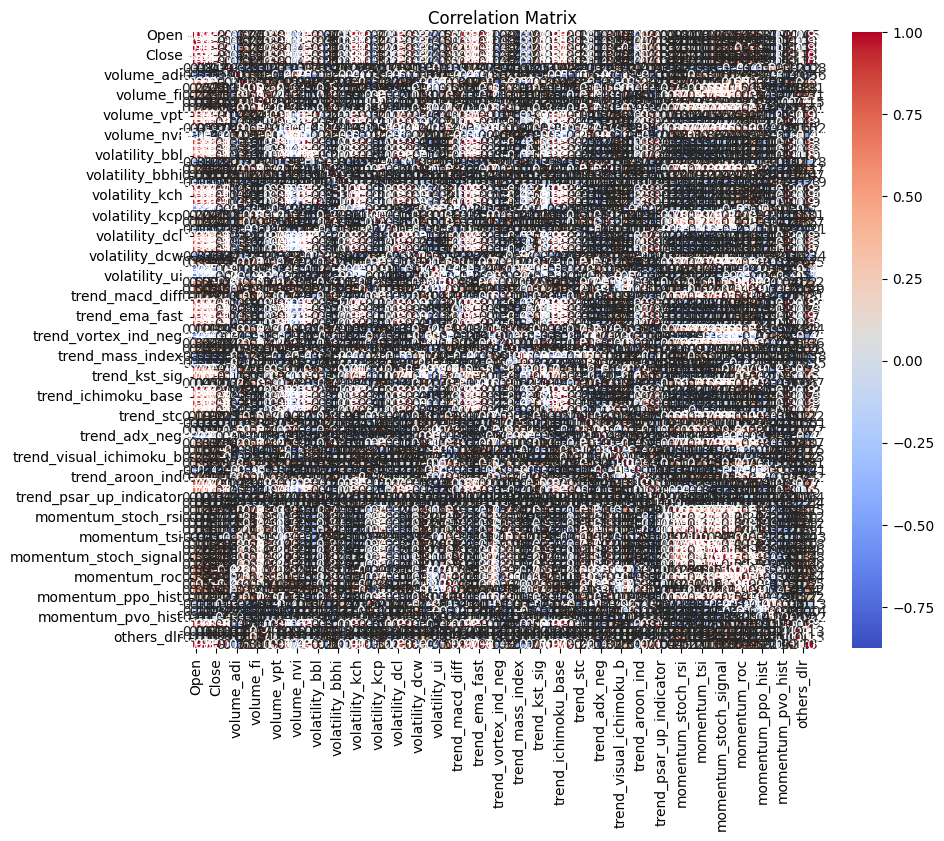

In [24]:
correlation_matrix = df.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [27]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'volume_adi',
       'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em',
       'volume_vpt', 'volume_vwap', 'volume_mfi', 'volume_nvi',
       'volatility_bbm', 'volatility_bbh', 'volatility_bbl', 'volatility_bbw',
       'volatility_bbp', 'volatility_bbhi', 'volatility_bbli',
       'volatility_kcc', 'volatility_kch', 'volatility_kcl', 'volatility_kcw',
       'volatility_kcp', 'volatility_kchi', 'volatility_kcli',
       'volatility_dcl', 'volatility_dch', 'volatility_dcm', 'volatility_dcw',
       'volatility_dcp', 'volatility_atr', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       